로이터 뉴스 카테고리 분류

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt


46 카테고리
8982 학습 뉴스 기사
2246 테스트 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Epoch 1/200
450/450 [==============================] - 6s 9ms/step - loss: 2.2218 - accuracy: 0.4374 - val_loss: 2.3831 - val_accuracy: 0.4568
Epoch 2/200
450/450 [==============================] - 4s 9ms/step - loss: 1.8471 - accuracy: 0.5405 - val_loss: 1.7325 - val_accuracy: 0.5628
Epoch 3/200
450/450 [==============================] - 4s 8ms/step - loss: 1.6195 - accuracy: 0.5816 - val_loss: 1.5851 - val_accuracy: 0.6086
Epoch 4/200
450/450 [==============================] - 4s 9ms/step - loss: 1.4468 - accuracy: 0.6360 - val_loss: 1.4267 - val_accuracy: 0.6474
Epoch 5/200
450/450 [=======================

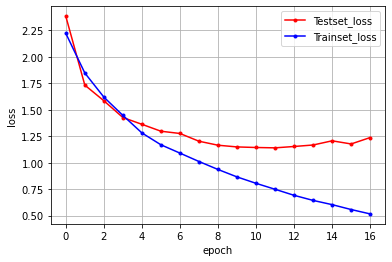

In [3]:
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=1000,test_split=0.2)

category = np.max(y_train)+1
print(category,'카테고리')
print(len(X_train),'학습 뉴스 기사')
print(len(X_test),'테스트 뉴스 기사')
print(X_train[0])

X_train = sequence.pad_sequences(X_train,maxlen=100)
X_test = sequence.pad_sequences(X_test,maxlen=100)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation='tanh'))
model.add(Dense(46,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

early_stopping_callback =EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

history = model.fit(X_train,y_train,batch_size=20,epochs=200,validation_data=(X_test,y_test),callbacks=[early_stopping_callback])

print('Test accuracy %.4f'%(model.evaluate(X_test,y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

영화 리뷰 분리하기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Dropout,Activation,MaxPooling1D,Conv1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_5 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 55)                26400     
                                                                 
 dense_3 (Dense)             (None, 1)                 56        
                                                      

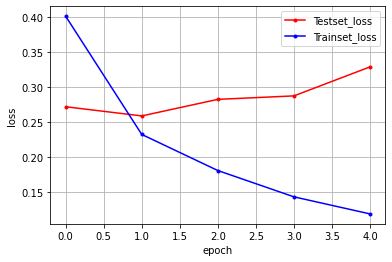

In [11]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train,maxlen=500)
X_test = sequence.pad_sequences(X_test,maxlen=500)

model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

history = model.fit(X_train,y_train,batch_size=40,epochs=100,
                    validation_split=0.25,callbacks=[early_stopping_callback])

print('\n Test Accuracy %.4f'%(model.evaluate(X_test,y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_vloss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

어텐션을 사용한 신경망

In [12]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Dropout,Activation,MaxPooling1D,Conv1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 500)         2500000   
                                                                 
 dropout_10 (Dropout)        (None, None, 500)         0         
                                                                 
 lstm_6 (LSTM)               (None, None, 64)          144640    
                                                                 
 attention_2 (Attention)     (None, 128)               20480     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
 activation_6 (Activation)   (None, 1)                

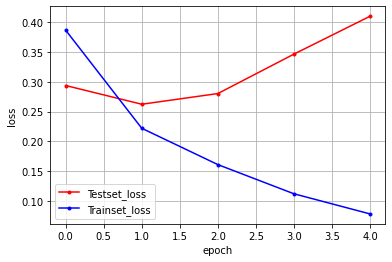

In [17]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train,maxlen=500)
X_test = sequence.pad_sequences(X_test,maxlen=500)

model = Sequential()
model.add(Embedding(5000,500))
model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

history = model.fit(X_train,y_train,batch_size=40,epochs=100,
                    validation_data=(X_test,y_test),callbacks=[early_stopping_callback])

print('\n Test Accuracy %.4f'%(model.evaluate(X_test,y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_vloss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()